In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit
import sys
from math import pi

In [2]:
file = open('../../input/IntPam2010.txt')
lines = file.readlines()
E_2010 = []
flux_2010 = []
for line in lines[1:]:
    e, f = line.split()
    E_2010.append(float(e))
    flux_2010.append(float(f))

In [3]:
file = open('../../input/IntPam2014.txt')

In [4]:
lines = file.readlines()

In [5]:
E = []
flux = []
for line in lines[1:]:
    e, f = line.split()
    E.append(float(e))
    flux.append(float(f))

In [6]:
E_2014 = E
flux_2014 = flux

In [7]:
E = np.array(E)
E

array([ 0.082,  0.095,  0.105,  0.11 ,  0.12 ,  0.13 ,  0.15 ,  0.16 ,
        0.17 ,  0.19 ,  0.21 ,  0.22 ,  0.24 ,  0.26 ,  0.29 ,  0.31 ,
        0.34 ,  0.36 ,  0.39 ,  0.43 ,  0.46 ,  0.5  ,  0.54 ,  0.58 ,
        0.62 ,  0.67 ,  0.72 ,  0.77 ,  0.83 ,  0.89 ,  0.96 ,  1.02 ,
        1.09 ,  1.17 ,  1.25 ,  1.34 ,  1.42 ,  1.52 ,  1.62 ,  1.72 ,
        1.83 ,  1.95 ,  2.07 ,  2.2  ,  2.33 ,  2.48 ,  2.62 ,  2.78 ,
        2.94 ,  3.12 ,  3.3  ,  3.49 ,  3.69 ,  4.12 ,  4.59 ,  5.11 ,
        5.68 ,  6.3  ,  6.99 ,  7.74 ,  8.57 ,  9.48 , 10.48 , 11.57 ,
       12.77 , 14.09 , 15.54 , 17.12 , 18.86 , 20.76 , 22.85 , 25.15 ,
       27.66 , 30.42 , 33.44 , 36.75 , 40.39 , 44.37 ])

In [8]:
flux = np.array(flux)
flux

array([1.64583e+02, 1.81962e+02, 1.99548e+02, 2.05254e+02, 2.23106e+02,
       2.86300e+02, 3.09547e+02, 2.87579e+02, 3.22769e+02, 3.14053e+02,
       3.22497e+02, 3.47635e+02, 3.95317e+02, 4.11836e+02, 4.20169e+02,
       4.65419e+02, 4.60405e+02, 4.76739e+02, 5.00676e+02, 5.12399e+02,
       5.40540e+02, 5.71107e+02, 5.18287e+02, 5.46131e+02, 5.32933e+02,
       5.56023e+02, 5.42074e+02, 5.67905e+02, 5.48560e+02, 5.37129e+02,
       5.07792e+02, 5.25093e+02, 5.11695e+02, 4.80355e+02, 4.69432e+02,
       4.65878e+02, 4.28841e+02, 4.11672e+02, 3.82659e+02, 3.75139e+02,
       3.48823e+02, 3.46174e+02, 3.16716e+02, 2.93339e+02, 2.72463e+02,
       2.58542e+02, 2.41663e+02, 2.18276e+02, 2.06426e+02, 1.91244e+02,
       1.70347e+02, 1.55731e+02, 1.36054e+02, 1.15714e+02, 9.21800e+01,
       7.94080e+01, 6.24110e+01, 5.02510e+01, 4.04260e+01, 3.35080e+01,
       2.53800e+01, 2.05170e+01, 1.64310e+01, 1.31350e+01, 1.02210e+01,
       7.71800e+00, 6.09500e+00, 4.84000e+00, 3.80500e+00, 3.044

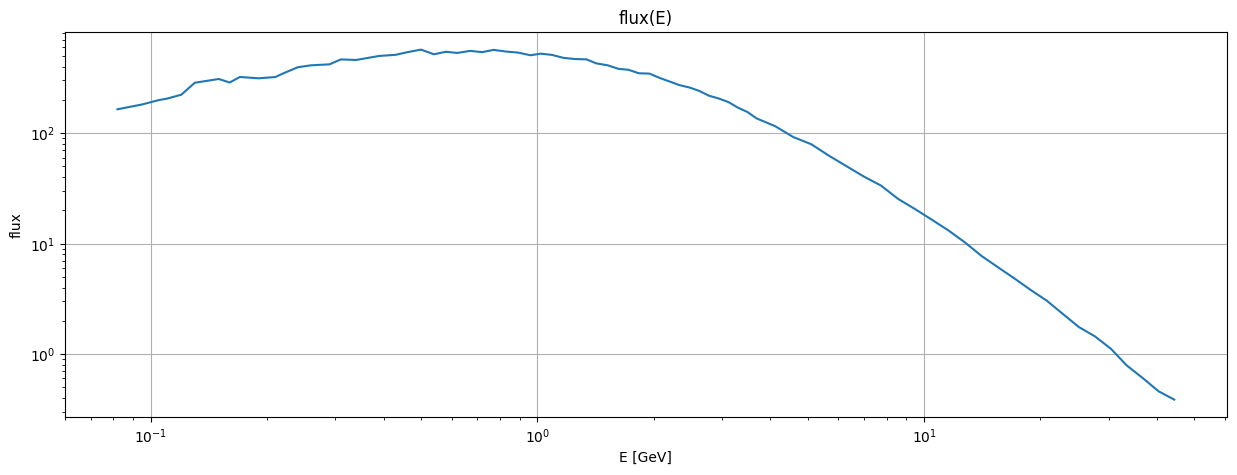

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(E, flux)
plt.semilogy()
plt.semilogx()
plt.grid(True)
ax.set_title('flux(E)')
ax.set_ylabel('flux')
ax.set_xlabel('E [GeV]');

In [10]:
def mapping1(values_x, a, b, c):
    return a * values_x**2 + b * values_x + c

In [11]:
args, _ = curve_fit(mapping1, E, flux)
a, b, c = args
y_fit1 = a * E**2 + b * E + c

In [12]:
def mapping2(values_x, a, b, c):
    return a * values_x**3 + b * values_x + c

In [13]:
args, _ = curve_fit(mapping2, E, flux)
a, b, c = args
y_fit2 = a * E**3 + b * E + c

In [14]:
def mapping3(values_x, a, b, c):
    return a * values_x**3 + b * values_x**2 + c

In [15]:
args, _ = curve_fit(mapping3, E, flux)
a, b, c = args
y_fit3 = a * E**3 + b * E**2 + c

In [16]:
def mapping4(values_x, a, b, c):
    return a * np.exp(b * values_x) + c

In [17]:
args, _ = curve_fit(mapping4, E, flux)
a, b, c = args
y_fit4 = a * np.exp(b * E) + c

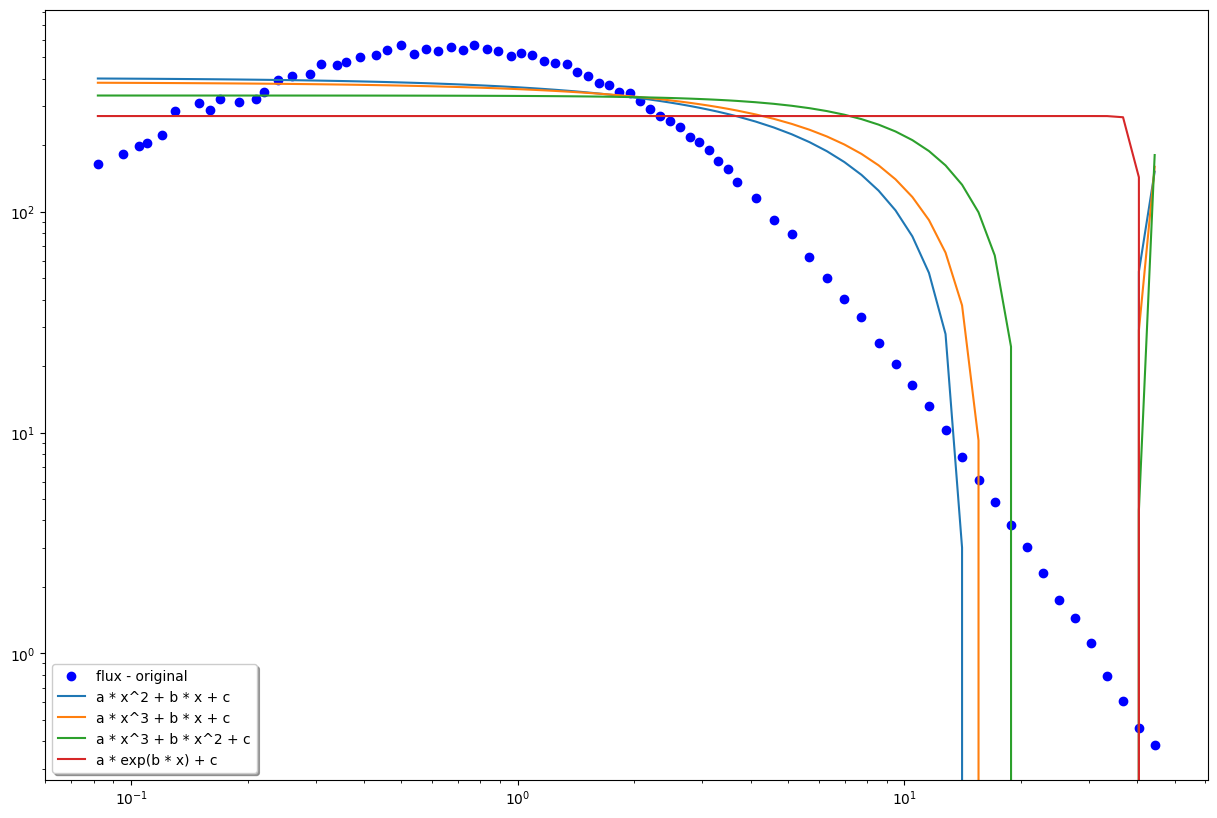

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(E, flux, 'bo', label='flux - original')
plt.plot(E, y_fit1, label='a * x^2 + b * x + c')
plt.plot(E, y_fit2, label='a * x^3 + b * x + c')
plt.plot(E, y_fit3, label='a * x^3 + b * x^2 + c')
plt.plot(E, y_fit4, label='a * exp(b * x) + c')
plt.semilogx()
plt.semilogy()
plt.legend(loc='best', fancybox=True, shadow=True);

In [19]:
degrees = (1, 2, 3, 4, 5, 10)

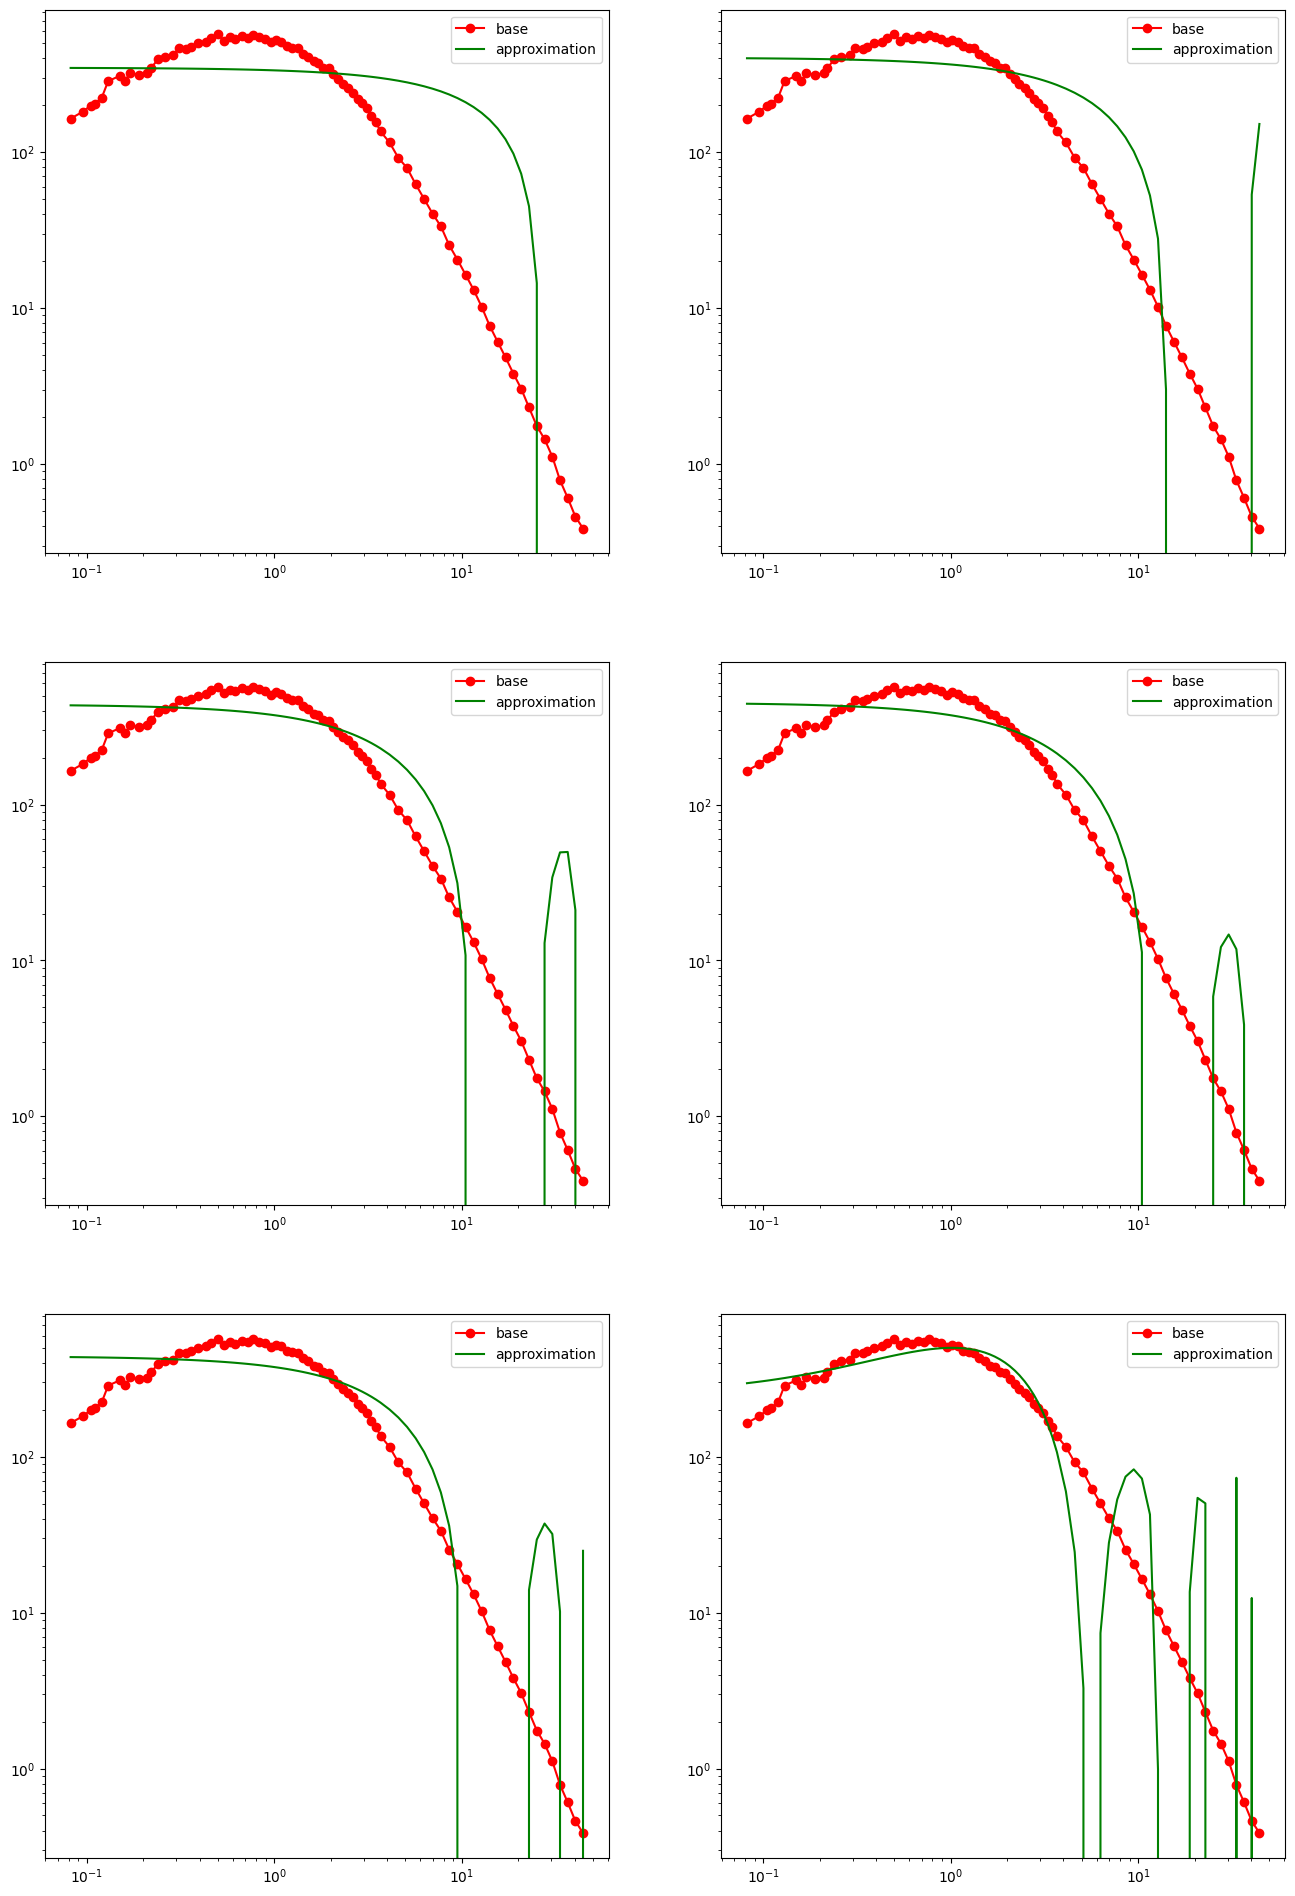

In [20]:
fig, axs = plt.subplots(figsize=(16, 24), nrows=3, ncols=2)
for ax, degree in zip(axs.flatten(), degrees):
    approximation = Polynomial.fit(E, flux, degree)
    ax.plot(E, flux, marker='o', color='red', label='base')
    ax.plot(E, approximation(E), color='green', label='approximation')
    ax.semilogx()
    ax.semilogy()
    ax.legend()

In [21]:
def lcheck(index, params):
    seq, x = params
    return seq[index][0] >= x

def lbinsearch(l, r, ckeck, checkparams):
    while l < r:
        m = (l + r) // 2
        if ckeck(m, checkparams):
            r = m
        else:
            l = m + 1
    return l

In [22]:
def rcheck(index, params):
    seq, x = params
    return seq[index][0] <= x

def rbinsearch(l, r, check, checkparams):
    while l < r:
        m = (l + r + 1) // 2
        if check(m, checkparams):
            l = m
        else:
            r = m - 1
    return r

In [23]:
flux_e = []

for i in range(len(E)):
    flux_e.append((E[i], flux[i]))

In [24]:
flux_e[0]

(0.082, 164.583)

In [25]:
flux_e_2010 = []

for i in range(len(E_2010)):
    flux_e_2010.append((E_2010[i], flux_2010[i]))

In [26]:
flux_e_2010[0]

(0.082, 1334.967)

In [27]:
flux_e_2014 = []

for i in range(len(E_2014)):
    flux_e_2014.append((E_2014[i], flux_2014[i]))

In [28]:
flux_e_2014[0]

(0.082, 164.583)

In [29]:
def func(x, f=flux_e):
    lindex = lbinsearch(0, len(f) - 1, lcheck, (f, x))
    rindex = rbinsearch(0, len(f) - 1, rcheck, (f, x))
    
    y1 = f[lindex][1]
    y2 = f[rindex][1]
    x1 = f[lindex][0]
    x2 = f[rindex][0]
    if x1 == x2:
        return y1
    return y1 + (y2 - y1) * (x - x1) / (x2 - x1)

In [30]:
E[-1]

44.37

In [31]:
func(1)

519.326

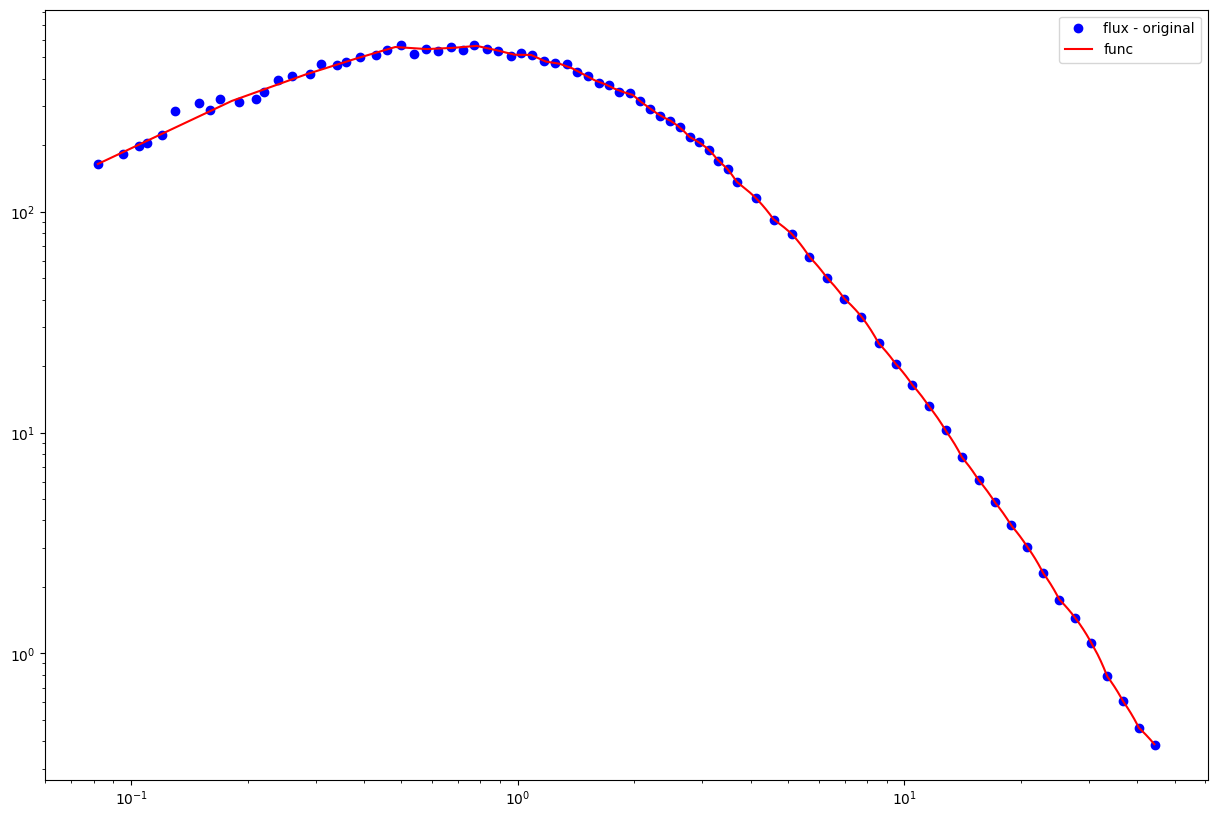

In [32]:
func_y = []
e_arr = []
ei = E[0]
while ei < E[-1]:
    func_y.append(func(ei))
    e_arr.append(ei)
    ei += 0.1

plt.subplots(figsize=(15, 10))
plt.plot(E, flux, 'bo', label='flux - original')
plt.plot(e_arr, func_y, color='red', label='func')
plt.semilogx()
plt.semilogy()
plt.legend();

In [33]:
def func_old(energy):
    index = lbinsearch(0, len(flux_e) - 1, lcheck, (flux_e, energy))
    return flux_e[index][1]

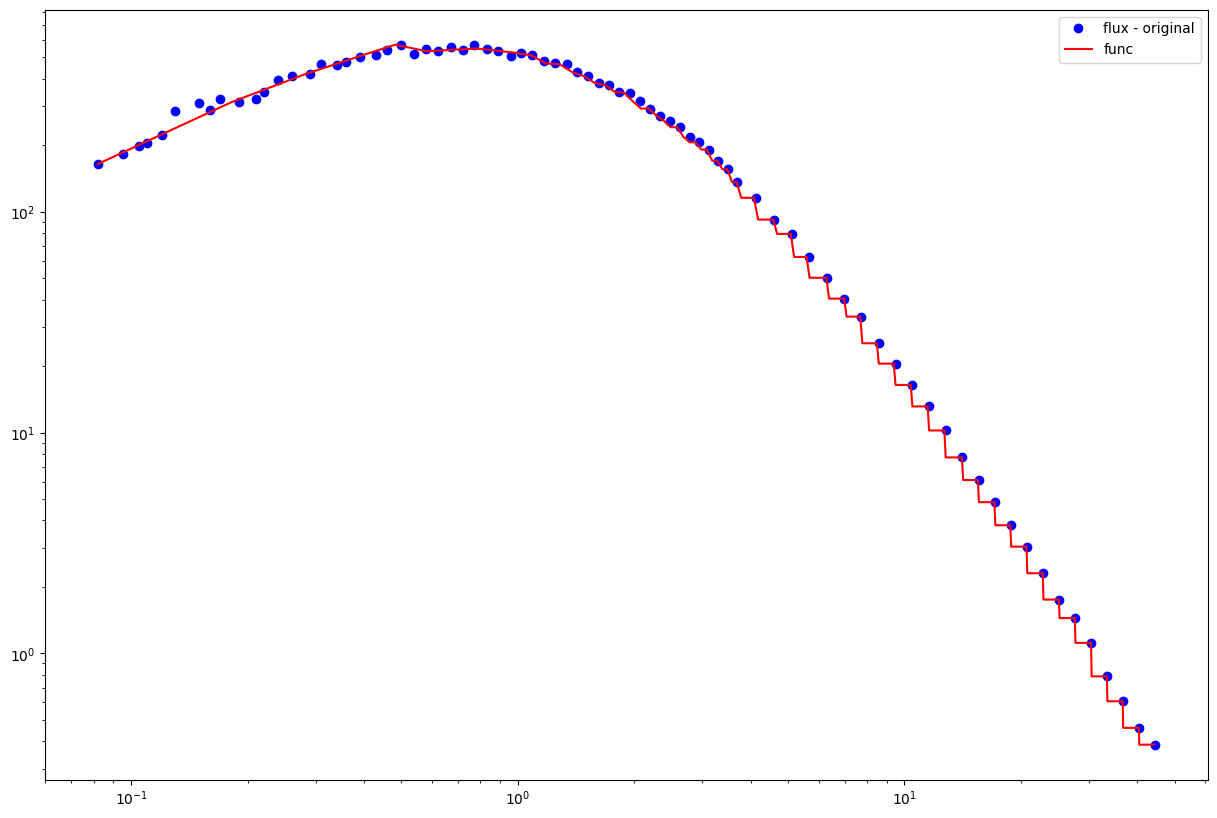

In [34]:
func_y = []
e_arr = []
ei = E[0]
while ei < E[-1]:
    func_y.append(func_old(ei))
    e_arr.append(ei)
    ei += 0.1

plt.subplots(figsize=(15, 10))
plt.plot(E, flux, 'bo', label='flux - original')
plt.plot(e_arr, func_y, color='red', label='func')
plt.semilogx()
plt.semilogy()
plt.legend();

In [35]:
n = 100000
de = (E[-1] - E[0]) / n
ei = E[0]
integral = 0

for _ in range(n):
    integral += func(ei) * de
    ei += de

print('integral =', integral)

integral = 1682.0310671173627


In [36]:
n = 100000
de = (E[-1] - E[0]) / n
ei = E[0]
old_integral = 0

for _ in range(n):
    old_integral += func_old(ei) * de
    ei += de

print('old_integral =', old_integral)

old_integral = 1612.38153193868


In [37]:
integral, old_integral

(1682.0310671173627, 1612.38153193868)

In [38]:
norm = 8. * (pi * 1.25)**2
norm

123.37005501361698

In [39]:
norm * integral

207512.2652848819

In [40]:
print(norm * integral * 100 / 10**6)

20.75122652848819


## Расчет кумулятивной функции 

In [61]:
def integral(a, b, f=flux_e):
    n = 100000
    de = (b - a) / n
    ei = a
    integral = 0

    for _ in range(n):
        integral += func(ei, f) * de
        ei += de
    
    return integral

In [109]:
cumulative_2010 = []
eps = E[0] / 100000
a, b = 0., 0.
integral_2010 = 0.
for i in range(len(E)):
    a, b = b, E[i] - eps
    integral_2010 += integral(a=a, b=b, f=flux_e_2010)
    cumulative_2010.append(integral_2010)
    eps = (b - a) / 100000

In [110]:
integral_2010

3913.3282406181293

In [111]:
cumulative_2010 /= integral_2010
cumulative_2010

array([0.02797266, 0.03248618, 0.03612093, 0.03812978, 0.0426001 ,
       0.04752761, 0.05872854, 0.06451416, 0.0702482 , 0.08248061,
       0.09513906, 0.10136674, 0.1137799 , 0.12665953, 0.1467754 ,
       0.16025501, 0.18024417, 0.19340308, 0.21253905, 0.23725663,
       0.255356  , 0.27851152, 0.30117431, 0.32337194, 0.34445086,
       0.36909057, 0.3923843 , 0.41507646, 0.44052711, 0.46406812,
       0.49008963, 0.5111284 , 0.5337517 , 0.5575159 , 0.5797412 ,
       0.60253797, 0.62128892, 0.64319711, 0.66313686, 0.68121737,
       0.69956057, 0.71806665, 0.73484803, 0.75125244, 0.7663726 ,
       0.78218188, 0.79522597, 0.808792  , 0.82131253, 0.83413539,
       0.84565528, 0.85641217, 0.86618959, 0.88424733, 0.90036203,
       0.91448374, 0.92683555, 0.93747529, 0.94677049, 0.95472659,
       0.96170636, 0.96768843, 0.97293627, 0.97744313, 0.98115568,
       0.98433516, 0.98721603, 0.98959432, 0.9915207 , 0.99317366,
       0.99459696, 0.99578537, 0.99676992, 0.99764059, 0.99839

In [106]:
cumulative_2014 = []
eps = E[0] / 100000
integral_2014 = 0.
a, b = 0., 0.
for i in range(len(E)):
    a, b = b, E[i] - eps
    integral_2014 += integral(a=a, b=b, f=flux_e_2014)
    cumulative_2014.append(integral_2014)
    eps = (b - a) / 100000

In [107]:
integral_2014

1695.4913506890202

In [108]:
cumulative_2014 /= integral_2014
cumulative_2014

array([0.00795974, 0.00928828, 0.01041342, 0.01101031, 0.01227354,
       0.01377577, 0.01729007, 0.01905098, 0.02085091, 0.02460688,
       0.02836123, 0.03033744, 0.03471939, 0.03947994, 0.04684069,
       0.05206384, 0.06025463, 0.06578187, 0.07442908, 0.08637927,
       0.09569457, 0.10880757, 0.12165804, 0.13421389, 0.14694253,
       0.16299916, 0.17919056, 0.19555718, 0.2153119 , 0.23452204,
       0.25609235, 0.27436816, 0.29577059, 0.31917501, 0.34158235,
       0.36640639, 0.38751459, 0.41230133, 0.43572611, 0.45807356,
       0.48155817, 0.50615269, 0.52961103, 0.55299872, 0.57468986,
       0.59817886, 0.6188303 , 0.64053209, 0.6605712 , 0.68168033,
       0.7008743 , 0.71914478, 0.73635427, 0.76828023, 0.79709488,
       0.82340757, 0.84724639, 0.86784531, 0.88629638, 0.90264875,
       0.91706262, 0.92937951, 0.94027549, 0.94977923, 0.95804447,
       0.96502756, 0.97093408, 0.97602916, 0.98046514, 0.98430271,
       0.98760076, 0.99035454, 0.9927217 , 0.99480616, 0.99650

In [89]:
len(E)

78

In [90]:
len(cumulative_2010)

78

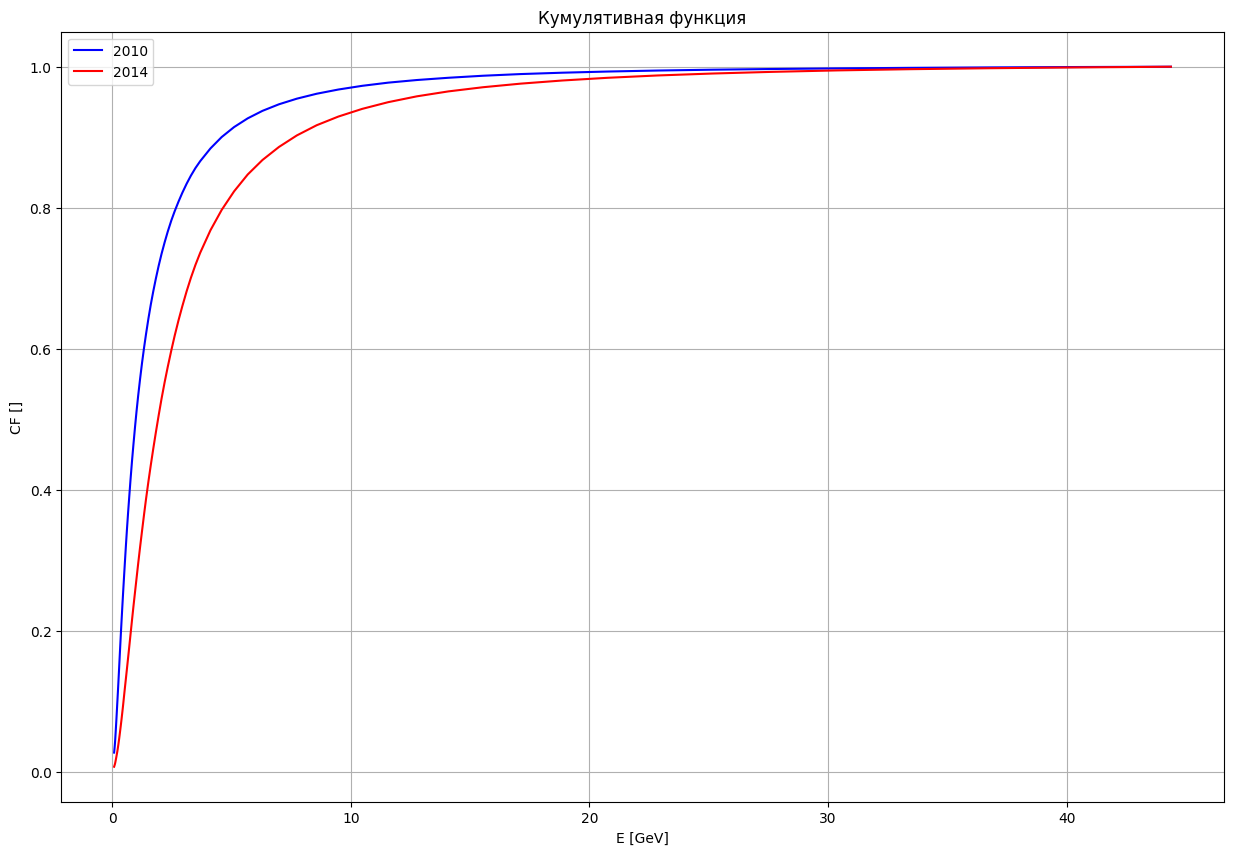

In [112]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(E, cumulative_2010, color='blue', label='2010')
plt.plot(E, cumulative_2014, color='red', label='2014')
#plt.semilogy()
plt.legend();
plt.grid(True)

ax.set_title('Кумулятивная функция')
ax.set_xlabel('E [GeV]')
ax.set_ylabel('CF []');

In [113]:
for i in range(len(cumulative_2010)):
    print(cumulative_2010[i], cumulative_2014[i])

0.027972659740271192 0.007959740423577116
0.032486175715673714 0.009288279858878116
0.036120926906341236 0.010413424133716735
0.038129784420181986 0.011010307315308112
0.04260009961984542 0.012273544947257964
0.0475276087448284 0.013775769871355746
0.0587285448078506 0.017290069928603716
0.06451416226450946 0.019050978078232996
0.07024820104323257 0.020850906741132668
0.08248061313038735 0.02460688092519265
0.09513905959613655 0.028361229810107337
0.10136674346508712 0.030337443793469608
0.11377989868044859 0.034719386068568385
0.12665952728752772 0.039479944421702086
0.1467754016867744 0.04684068505843413
0.16025501269120523 0.052063843453917694
0.18024416808632046 0.06025463032606141
0.19340307972556894 0.06578187021509083
0.2125390535841804 0.07442907699143333
0.23725663279470666 0.0863792671599827
0.25535599903576356 0.09569457170418973
0.27851151545679353 0.10880757211046965
0.30117430682935387 0.12165803847873842
0.3233719369786371 0.13421389332655226
0.34445085837942707 0.146942

# Расчет полной энергии упавшей на детектор

E_in = integral(dN/dE * E dE)

In [ ]:
n = 100000
de = (E[-1] - E[0]) / n
ei = E[0]
integral = 0

for _ in range(n):
    integral += func(ei) * ei * de
    ei += de

print('integral =', integral)

In [ ]:
norm * integral * 3804 / 469318.73

In [ ]:
norm

In [ ]:
3804 / 469318.73

In [ ]:
def culc_full_E_from_file(file_name):
    file = open(f'../energy_source/input/{file_name}')
    lines = file.readlines()

    full_E = 0.
    for line in lines:
        full_E += float(line)

    return full_E

In [ ]:
culc_full_E_from_file('base_geo_3_boron_3804_ev_2010.txt')

In [ ]:
culc_full_E_from_file('only_boron_geo_3_percent_of_boron_and_r125cm_3804_ev_2010.txt')

In [ ]:
culc_full_E_from_file('only_boron_geo_6_percent_of_boron_44_C_50_H_and_r125cm_3804_ev_2010.txt')